In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load all sheets from the Excel file

In [2]:
CD_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Customer_Demographics')
txn_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Transaction_History')
CS_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Customer_Service')
OA_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Online_Activity')
Churn_df = pd.read_excel("Customer_Churn_Data_Large.xlsx", sheet_name='Churn_Status')



In [3]:
Churn_df.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


#  Customer Demographics Analysis

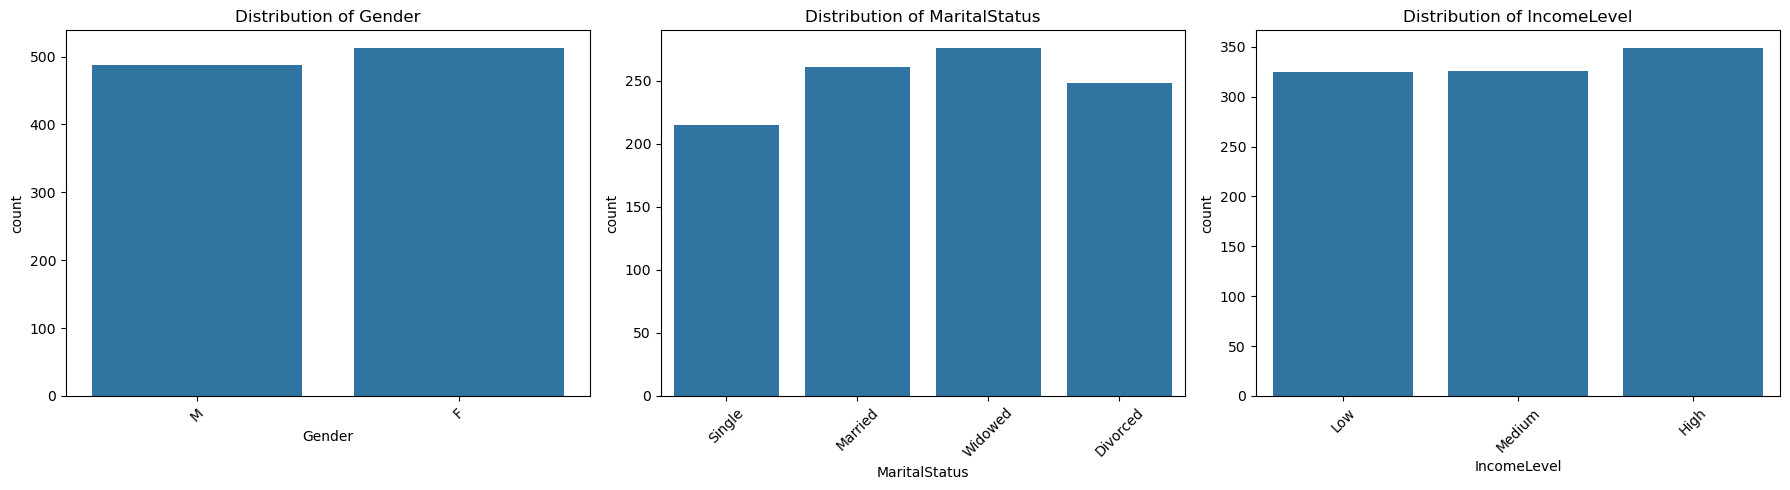

In [20]:
# Distribution of categorical features
categorical_cols = ['Gender', 'MaritalStatus', 'IncomeLevel']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=CD_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

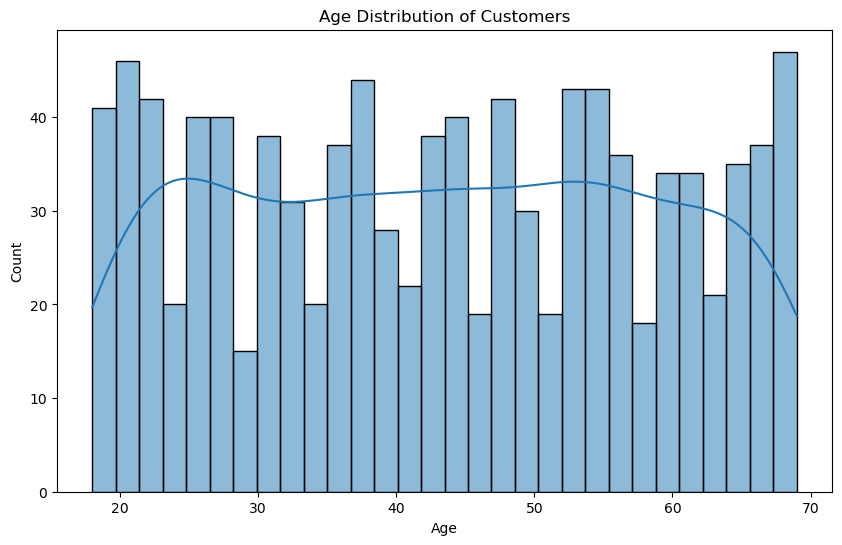

In [22]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=CD_df, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

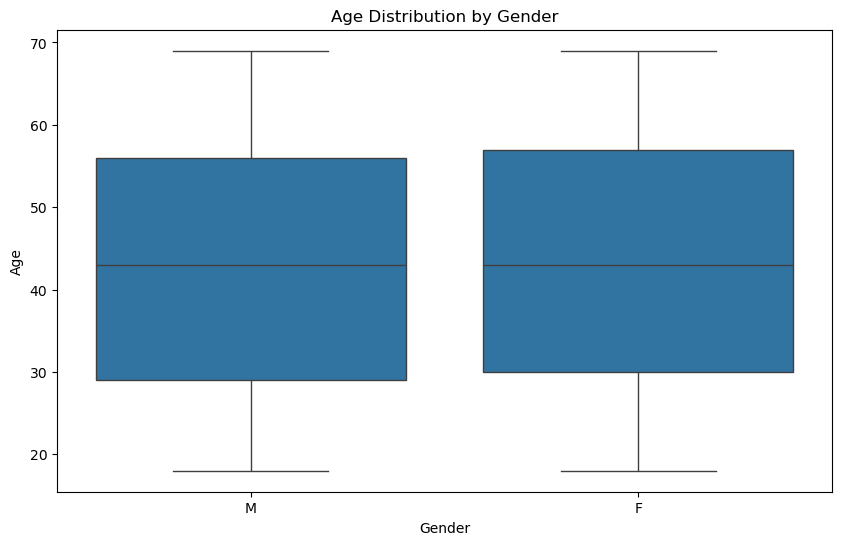

In [23]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=CD_df, x='Gender', y='Age')
plt.title('Age Distribution by Gender')
plt.show()

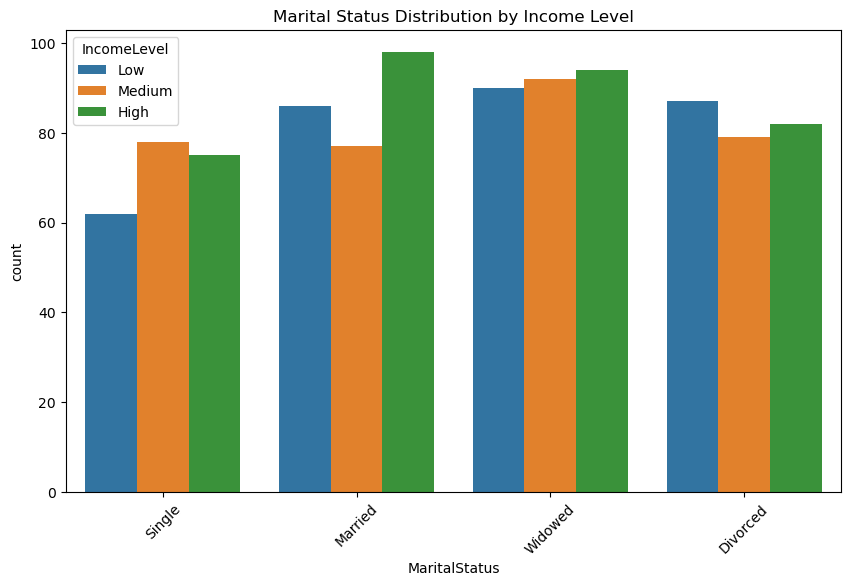

In [24]:
# Marital status by income level
plt.figure(figsize=(10, 6))
sns.countplot(data=CD_df, x='MaritalStatus', hue='IncomeLevel')
plt.title('Marital Status Distribution by Income Level')
plt.xticks(rotation=45)
plt.show()

# Transaction History Analysis

In [25]:
# Extract month and year from transaction date
txn_df['TransactionMonth'] = txn_df['TransactionDate'].dt.month
txn_df['TransactionYear'] = txn_df['TransactionDate'].dt.year

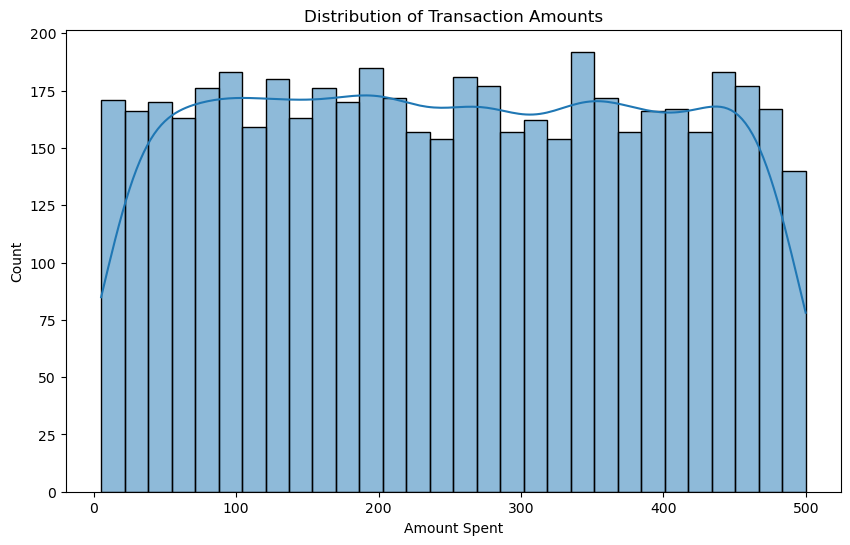

In [26]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data=txn_df, x='AmountSpent', bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()

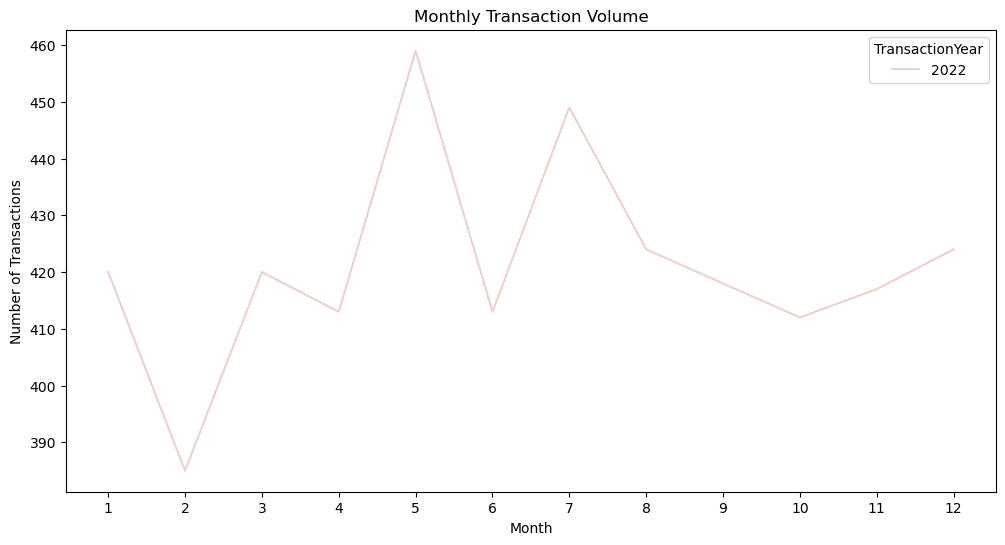

In [27]:
# Monthly transaction patterns
monthly_transactions = txn_df.groupby(['TransactionYear', 'TransactionMonth']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_transactions, x='TransactionMonth', y='Count', hue='TransactionYear')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13))
plt.show()

In [31]:
# Average spending by customer
customer_spending = txn_df.groupby('CustomerID')['AmountSpent'].agg(['sum', 'mean', 'count']).reset_index()
customer_spending.rename(columns={'sum': 'TotalSpent', 'mean': 'AvgSpent', 'count': 'TransactionCount'}, inplace=True)
customer_spending

,CustomerID,TotalSpent,AvgSpent,TransactionCount
0,1,416.50,416.500000,1
1,2,1547.42,221.060000,7
2,3,1702.98,283.830000,6
3,4,917.29,183.458000,5
4,5,2001.49,250.186250,8
...,...,...,...,...
995,996,227.25,227.250000,1
996,997,419.82,209.910000,2
997,998,252.15,252.150000,1
998,999,2393.26,265.917778,9


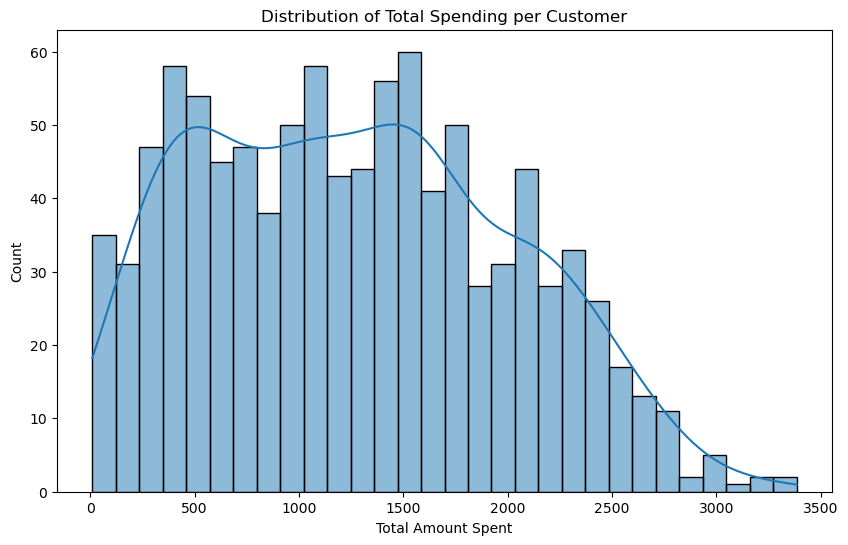

In [32]:
# Distribution of total spending
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_spending, x='TotalSpent', bins=30, kde=True)
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Amount Spent')
plt.ylabel('Count')
plt.show()


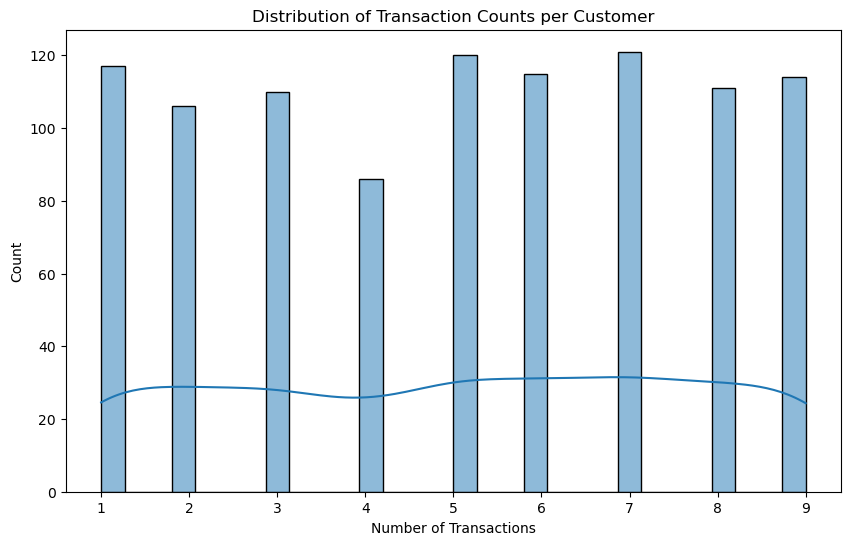

In [33]:
# Distribution of transaction counts
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_spending, x='TransactionCount', bins=30, kde=True)
plt.title('Distribution of Transaction Counts per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Count')
plt.show()

# Service data analysis

In [34]:
CS_df.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


<Axes: xlabel='InteractionType', ylabel='Count'>

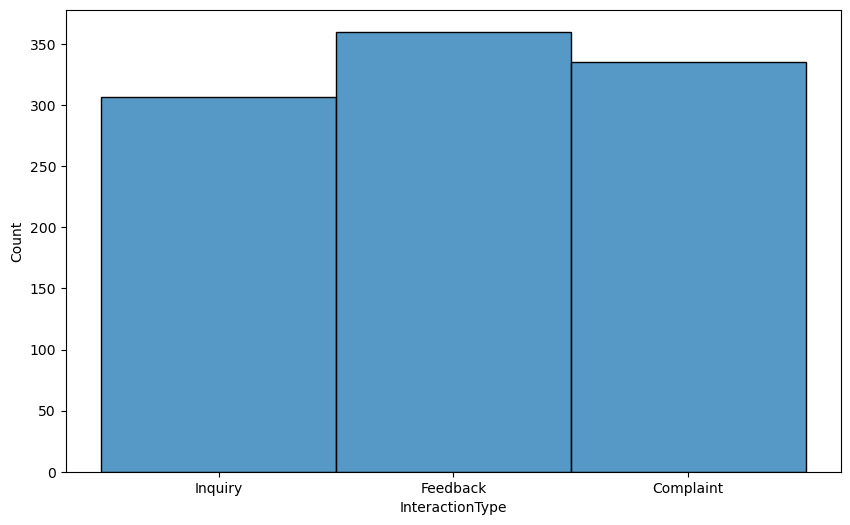

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data=CS_df,x='InteractionType',bins=10)

In [44]:
CS_df_merged = CS_df.merge(Churn_df,on='CustomerID',how='left')

In [45]:
complaints_df = CS_df_merged[CS_df_merged['InteractionType'] == 'Complaint']
complaints_df.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus,ChurnStatus
13,13,9681,2022-07-27,Complaint,Resolved,0
14,14,4459,2022-07-25,Complaint,Unresolved,0
17,15,3914,2022-02-04,Complaint,Unresolved,0
23,19,9979,2022-11-28,Complaint,Unresolved,0
24,19,8180,2022-04-18,Complaint,Unresolved,0


In [47]:
complaints_per_user = complaints_df.groupby('CustomerID').size().reset_index(name="TotalComplaints")
complaints_per_user.head()

,CustomerID,TotalComplaints
0,13,1
1,14,1
2,15,1
3,19,2
4,23,2


In [61]:
# Count resolved and unresolved complaints per user
resolution_counts = complaints_df.groupby(['CustomerID', 'ResolutionStatus']).size().unstack(fill_value=0).reset_index()
resolution_counts.head()

ResolutionStatus,CustomerID,Resolved,Unresolved
0,13,1,0
1,14,0,1
2,15,0,1
3,19,0,2
4,23,1,1


In [73]:
# Combine the results
result = complaints_per_user.merge(resolution_counts, on='CustomerID', how='left')\
        .merge(Churn_df,on='CustomerID',how='left').fillna(0)
# Rename columns for clarity
result = result.rename(columns={'Resolved': 'ResolvedComplaints', 'Unresolved': 'UnresolvedComplaints'})
result.head()
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   CustomerID            297 non-null    int64
 1   TotalComplaints       297 non-null    int64
 2   ResolvedComplaints    297 non-null    int64
 3   UnresolvedComplaints  297 non-null    int64
 4   ChurnStatus           297 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


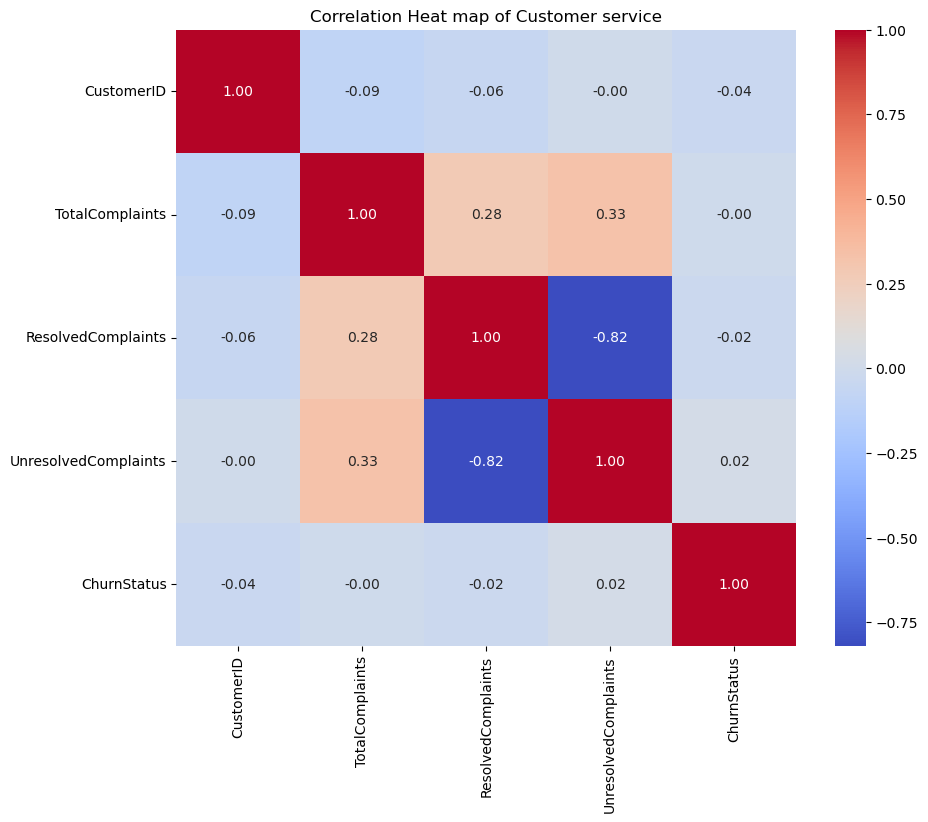

In [69]:
plt.figure(figsize=(10,8))
corr = result.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heat map of Customer service')
plt.show()

In [78]:
# Group by churn status and compare complaint stats
churn_comparison = result.groupby('ChurnStatus').agg({
    'TotalComplaints': 'mean',
    'ResolvedComplaints': 'mean',
    'UnresolvedComplaints': 'mean'
}).rename(columns={
    'TotalComplaints': 'AvgComplaints',
    'ResolvedComplaints': 'AvgResolved',
    'UnresolvedComplaints': 'AvgUnresolved'
})

print(churn_comparison)

             AvgComplaints  AvgResolved  AvgUnresolved
ChurnStatus                                           
0                 1.128755     0.532189       0.596567
1                 1.125000     0.500000       0.625000


# Step 3: Merge datasets on 'CustomerID'

In [4]:
df=CD_df.merge(txn_df,on='CustomerID',how='left')\
.merge(CS_df,on='CustomerID',how='left')\
.merge(OA_df,on='CustomerID',how='left')\
.merge(Churn_df,on='CustomerID',how='left')

df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     5204 non-null   float64       
 10  InteractionDate   5204 non-null   datetime64[ns]
 11  InteractionType   5204 non-null   object        
 12  ResolutionStatus  5204 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

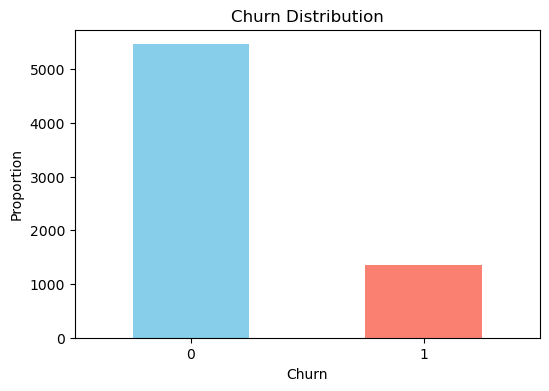

In [6]:
plt.figure(figsize=(6,4))
df['ChurnStatus'].value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

# Univariate & Bivariate Analysis so we can see how each feature relates to churn.

In [7]:
numeric_col = df.select_dtypes(include=['int64','float64']).columns
print(numeric_col)

Index(['CustomerID', 'Age', 'TransactionID', 'AmountSpent', 'InteractionID',
       'LoginFrequency', 'ChurnStatus'],
      dtype='object')


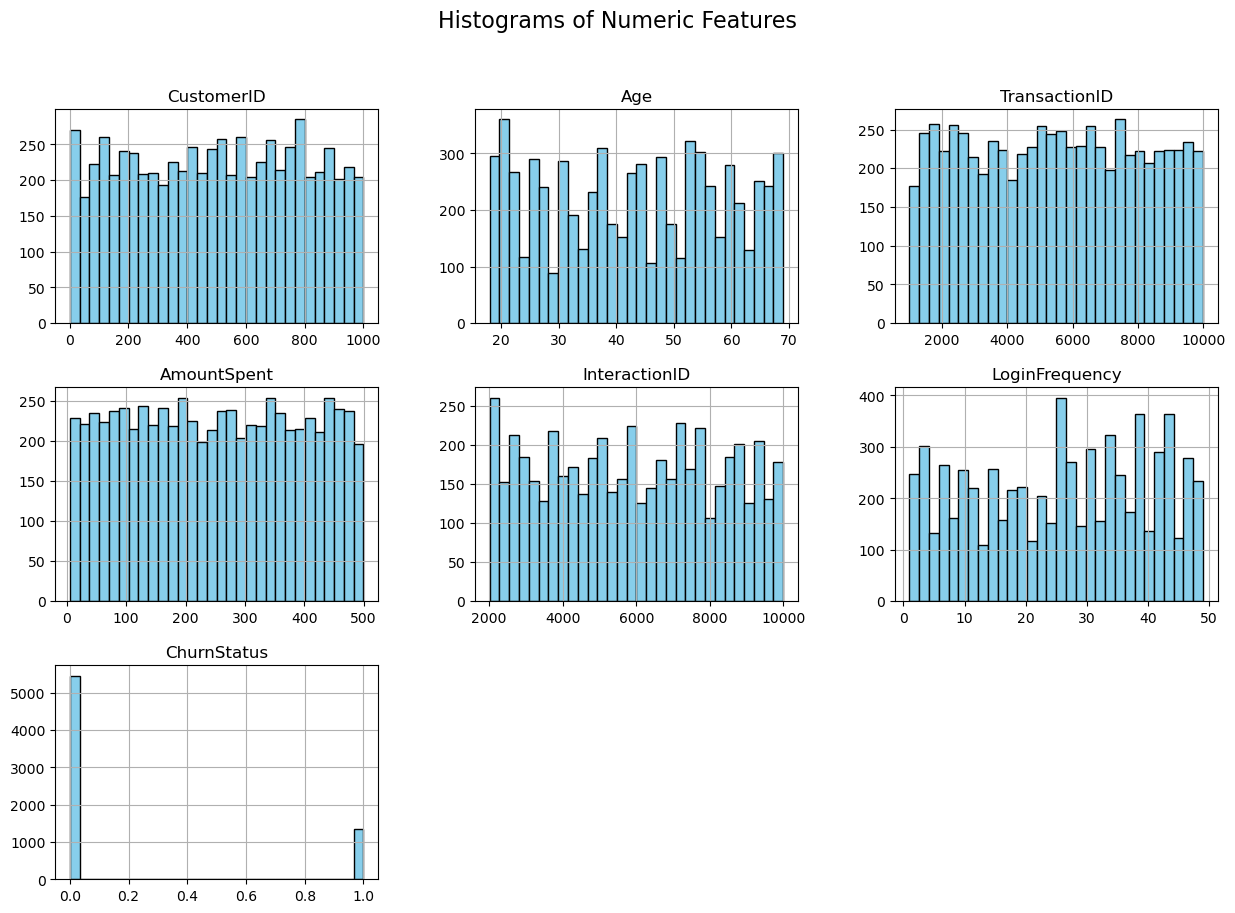

In [8]:
df[numeric_col].hist(bins=30,figsize=(15,10),color='skyblue',edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

## ----- 2. Boxplots of numeric features vs Churn -----


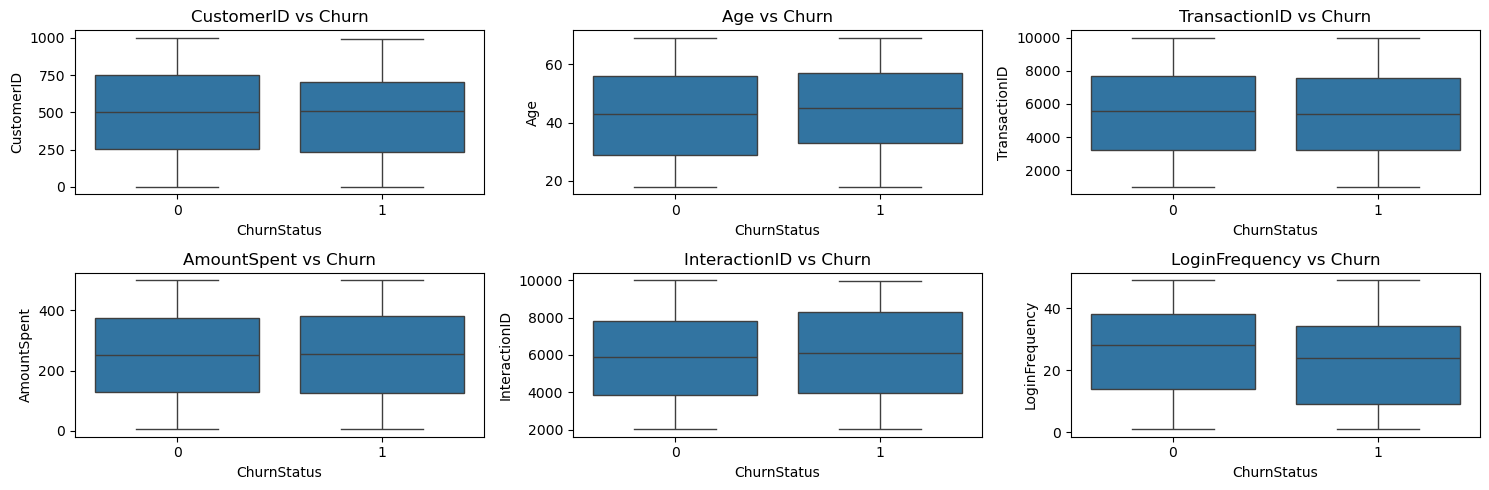

In [9]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_col[:6]):  # First 6 numeric columns
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x='ChurnStatus', y=col)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

In [10]:

# ----- 3. Churn rate by categorical features -----
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory',
       'InteractionType', 'ResolutionStatus', 'ServiceUsage'],
      dtype='object')

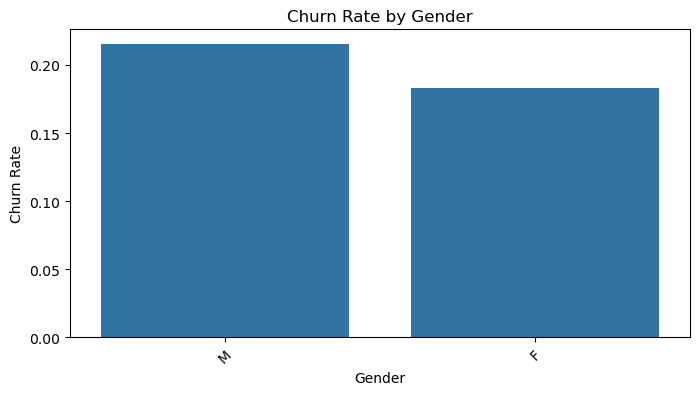

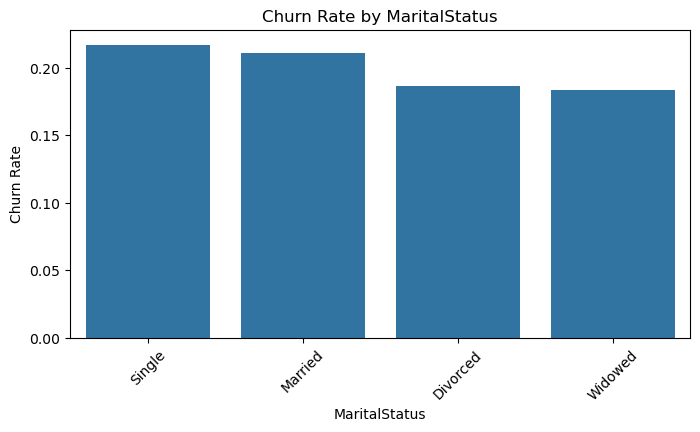

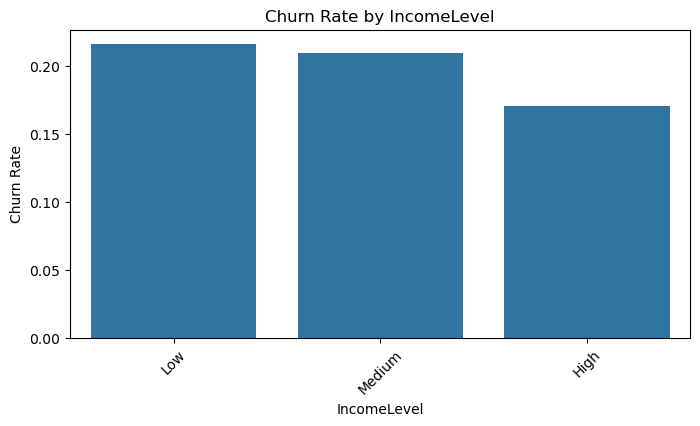

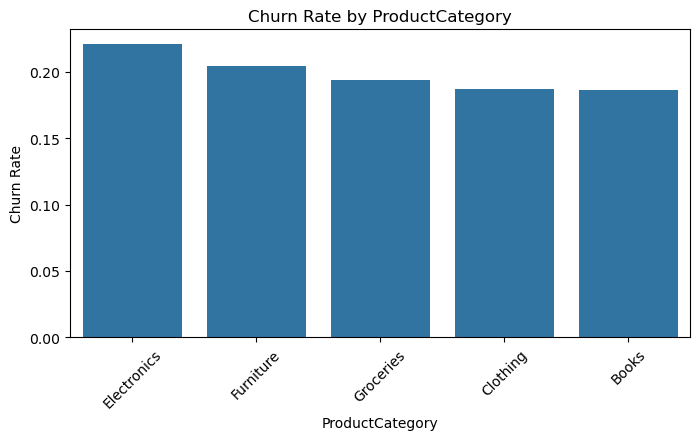

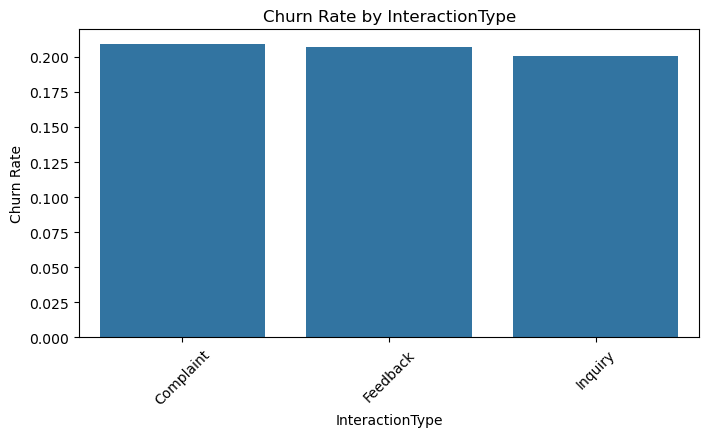

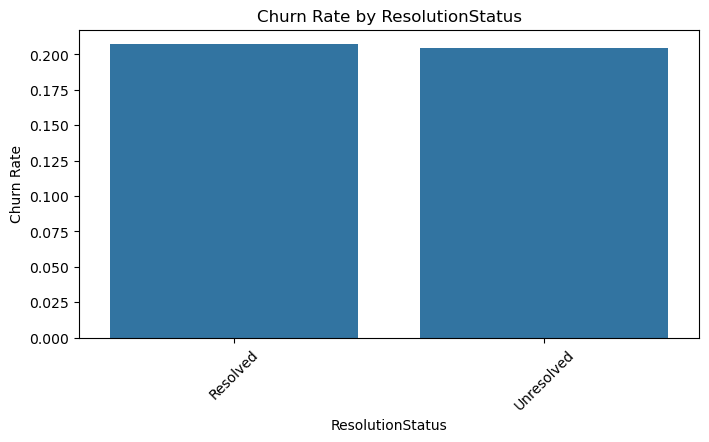

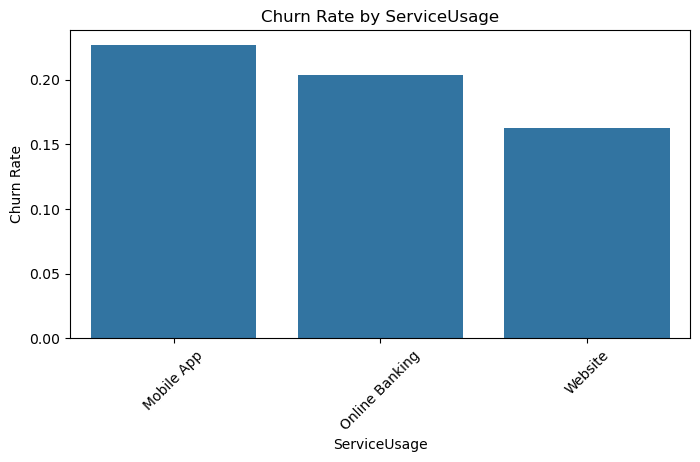

In [11]:
for col in categorical_cols:
    churn_rate = df.groupby(col)['ChurnStatus'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.show()


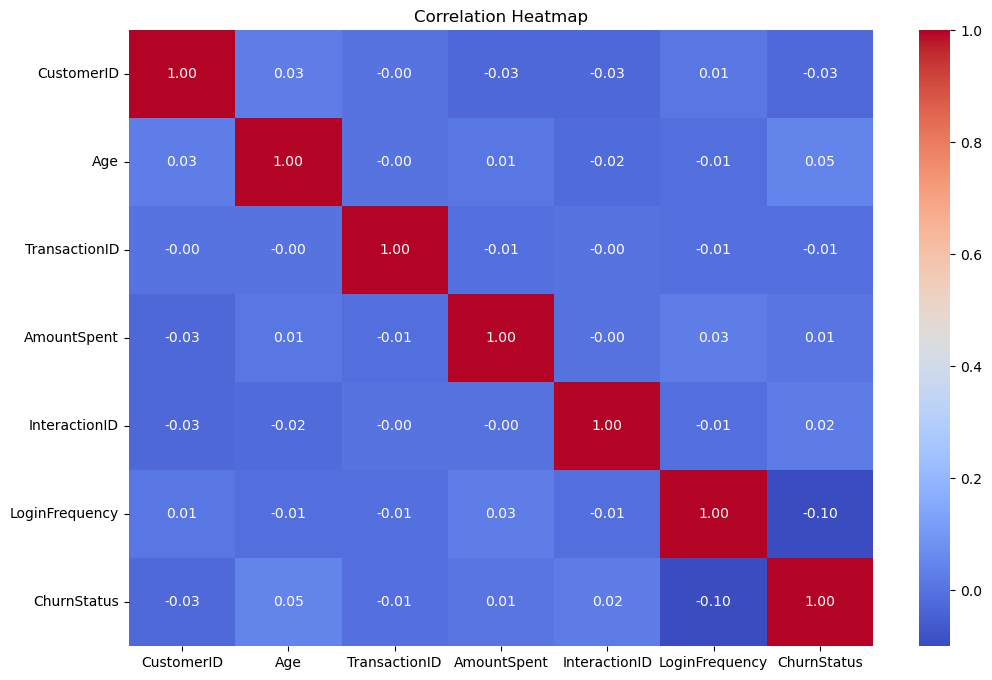

In [12]:
# ----- 4. Correlation heatmap -----
plt.figure(figsize=(12,8))
corr = df[numeric_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()